# **Predicting Traffic Accident Severity**

## 1.0 **Description**

Traffic accidents are a widespread global concern, often leading to devastating consequences such as injuries, fatalities, and significant financial losses. These incidents are influenced by a variety of environmental and temporal factors, and understanding the role these variables play in determining accident severity can be critical for addressing public safety challenges.

Factors like adverse weather conditions; rain, snow, fog, and other phenomena can impair visibility, reduce road friction, and compromise vehicle control. Similarly, time-related factors such as the time of day, day of the week, or holidays significantly alter traffic flow and driver behavior. For instance, peak commuting hours can increase congestion-related risks, while late-night driving may involve factors like fatigue or impaired judgment. The interplay between these variables creates a complex web of influences that must be untangled to predict accident severity.

This project seeks to address this complexity through the application of machine learning, aiming to develop a model capable of predicting traffic incident severity based on those factors. Using historical traffic data from the San Francisco open data platform, the model is trained on features such as meteorological conditions, time-based variables, and other indicators that influence accident outcomes. Focusing on differentiating mild outcomes from severe ones such as injuries or fatalities the model aims to provide transportation authorities, emergency responders, and city planners with actionable insights to improve resource allocation and public safety interventions.

This initiative is not just about reducing the severity of traffic accidents; it also addresses the broader goal of integrating data science into urban planning and public safety decision-making. By uncovering hidden patterns and relationships that traditional methods might overlook, this project has the potential to create a scalable, impactful solution for improving traffic safety. With far-reaching benefits for communities, infrastructure, and emergency services, the findings could serve as a model for other cities worldwide. The ultimate aim is to use technology to not only save lives and reduce injuries but also contribute to safer and more efficient transportation systems overall.


## 1.1 Business Understanding

Aiming to reduce the devastating consequences of road traffic accidents,this project employs machine learning to predict accident severity. The model, trained on data including vehicle type,casualty details,the type of the road, the location, the weather at the time of the accident just to mention a few, that can be used to inform proactive strategies aimed at reducing fatalities and injuries.

Traffic incidents contribute significantly to congestion, injuries, fatalities, and economic losses. Understanding the factors that influence the severity of these incidents can help reduce the overall impact on society. By leveraging data science to predict the severity of traffic incidents based on weather and time related variables, transportation agencies can:

- ```Improve Safety```: Predicting severe incidents allows for timely interventions, such as dispatching emergency services more effectively.


- ```Optimize Resource Allocation```: Traffic management and emergency responders can allocate resources in advance based on predicted severity, ensuring quicker response times in critical situations.

- ```Enhance Traffic Management```: Better understanding of incident severity can guide traffic signal optimization, road closures, and detour planning to minimize disruptions.

- ```Promote Public Awareness```: Through predictive insights, authorities can inform drivers about weather-related risks and encourage safer driving practices during high-risk periods.

This project aims to create a solution that not only reduces the severity of traffic incidents but also improves overall traffic flow and safety.

The data was sourced from https://data.sfgov.org/Public-Safety/Traffic-Crashes-Resulting-in-Injury/ubvf-ztfx/about_data

## 1.2 Objectives

❖Identify high-risk neighborhoods and geographical hotspots for 
traffic incidents through geospatial mapping.

❖Build a predictive model: develop a machine learning model 
capable of predicting the severity of road traffic accidents based 
on relevant features such as vehicle type, casualty details, road 
type, location, weather conditions, and time-related factors.

❖Identify the most influential factors for predicting accident 
severity

## 1.3 Shareholders

- ```Transportation Authorities```: Local and regional traffic management departments who would benefit from predictive tools to optimize response times and reduce traffic disruptions.

- ```Emergency Services```: Police, fire departments, and medical teams who could use severity predictions to prepare resources and prioritize high-risk incidents.
- ```City Planners and Government Agencies```: Municipal decision makers focused on infrastructure planning and public safety initiatives could use these insights to improve roadways and safety measures.

- ```Public and Drivers```: The general public will benefit indirectly through increased safety, fewer severe accidents, and enhanced traffic management.

- ```Insurance Companies```: Insurers could use severity predictions to optimize their pricing models, assess risk in real-time, and process claims more efficiently.
- ```Weather Services```: Weather data providers may collaborate for deeper insights and provide better real-time forecasts for integrating into the system.

- ```Technology Providers```: Companies providing machine learning infrastructure, cloud services, and data collection tools will play a role in the development and deployment of the model.

## **2.0 Data Loading and Data Understanding**

In [69]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import warnings
import contextily as ctx
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbaPipeline


# Suppress all warnings
warnings.filterwarnings('ignore')

In [70]:
# Loading the data and printing out the head
data = pd.read_csv('Data\Traffic_Crashes_Resulting_in_Injury_20250305.csv')
data.head()

,unique_id,cnn_intrsctn_fkey,cnn_sgmt_fkey,case_id_pkey,tb_latitude,tb_longitude,geocode_source,geocode_location,collision_datetime,collision_date,...,data_updated_at,data_loaded_at,analysis_neighborhood,supervisor_district,police_district,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,Neighborhoods,SF Find Neighborhoods
0,82049,20208000.0,8087000.0,230041955,37.734019,-122.388046,SFPD-INTERIM DB,CITY STREET,01/18/2023 05:53:00 PM,2023 January 18,...,01/21/2025 12:00:00 AM,02/10/2025 01:42:44 PM,Bayview Hunters Point,10.0,BAYVIEW,2.0,9.0,1.0,86.0,86.0
1,82166,25723000.0,805000.0,230111655,37.762886,-122.428578,SFPD-INTERIM DB,CITY STREET,02/15/2023 09:30:00 AM,2023 February 15,...,01/21/2025 12:00:00 AM,02/10/2025 01:42:44 PM,Castro/Upper Market,8.0,MISSION,3.0,5.0,5.0,37.0,37.0
2,41951,32862000.0,7826101.0,3491922,37.768636,-122.454858,SFPD-CROSSROADS,CITY STREET,11/11/2007 03:50:00 PM,2007 November 11,...,04/26/2023 12:00:00 AM,02/10/2025 01:42:44 PM,Golden Gate Park,5.0,PARK,7.0,11.0,12.0,9.0,9.0
3,48546,23904000.0,NaN,190523857,37.780363,-122.399080,SFPD-INTERIM DB,CITY STREET,07/19/2019 01:50:00 PM,2019 July 19,...,04/26/2023 12:00:00 AM,02/10/2025 01:42:44 PM,South of Market,6.0,SOUTHERN,1.0,10.0,34.0,32.0,32.0
4,35692,26705000.0,NaN,170390767,37.804146,-122.425110,SFPD-CROSSROADS,CITY STREET,05/11/2017 07:53:00 AM,2017 May 11,...,04/26/2023 12:00:00 AM,02/10/2025 01:42:44 PM,Russian Hill,2.0,CENTRAL,6.0,6.0,32.0,98.0,98.0


In [71]:
# understanding the shape of the data
shape = data.shape
print(shape)
print(f'the traffic data set has',shape[0] ,'rows and',shape[1],'columns')

(61229, 63)
the traffic data set has 61229 rows and 63 columns


In [72]:
# inspecting the columns
columns = data.columns
print(columns)

Index(['unique_id', 'cnn_intrsctn_fkey', 'cnn_sgmt_fkey', 'case_id_pkey',
       'tb_latitude', 'tb_longitude', 'geocode_source', 'geocode_location',
       'collision_datetime', 'collision_date', 'collision_time',
       'accident_year', 'month', 'day_of_week', 'time_cat', 'juris',
       'officer_id', 'reporting_district', 'beat_number', 'primary_rd',
       'secondary_rd', 'distance', 'direction', 'weather_1', 'weather_2',
       'collision_severity', 'type_of_collision', 'mviw', 'ped_action',
       'road_surface', 'road_cond_1', 'road_cond_2', 'lighting',
       'control_device', 'intersection', 'vz_pcf_code', 'vz_pcf_group',
       'vz_pcf_description', 'vz_pcf_link', 'number_killed', 'number_injured',
       'street_view', 'dph_col_grp', 'dph_col_grp_description',
       'party_at_fault', 'party1_type', 'party1_dir_of_travel',
       'party1_move_pre_acc', 'party2_type', 'party2_dir_of_travel',
       'party2_move_pre_acc', 'point', 'data_as_of', 'data_updated_at',
       'data_

In [73]:
# checking info
info = data.info()
print(info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61229 entries, 0 to 61228
Data columns (total 63 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   unique_id                     61229 non-null  int64  
 1   cnn_intrsctn_fkey             61207 non-null  float64
 2   cnn_sgmt_fkey                 27336 non-null  float64
 3   case_id_pkey                  61229 non-null  object 
 4   tb_latitude                   61062 non-null  float64
 5   tb_longitude                  61062 non-null  float64
 6   geocode_source                61229 non-null  object 
 7   geocode_location              61229 non-null  object 
 8   collision_datetime            61229 non-null  object 
 9   collision_date                61229 non-null  object 
 10  collision_time                61169 non-null  object 
 11  accident_year                 61229 non-null  int64  
 12  month                         61229 non-null  object 
 13  d

### 2.1 Dataset Description

#### Overview
This dataset contains information about traffic accidents, with a total of 61,229 entries. It includes various attributes related to the accident details, such as location, time, collision type, and injury data. The dataset is valuable for analysis related to traffic safety, accident severity, and patterns across different areas and conditions.

#### Features
The dataset consists of the following columns:

- **unique_id**: Unique identifier for each accident (int64).
- **cnn_intrsctn_fkey**: Foreign key linking to intersection data (float64).
- **cnn_sgmt_fkey**: Foreign key linking to segment data (float64).
- **case_id_pkey**: Primary key for case ID (object).
- **tb_latitude**: Latitude of the accident (float64).
- **tb_longitude**: Longitude of the accident (float64).
- **geocode_source**: Source of geocoding data (object).
- **geocode_location**: Geocoded location information (object).
- **collision_datetime**: Date and time of the collision (object).
- **collision_date**: Date of the collision (object).
- **collision_time**: Time of the collision (object).
- **accident_year**: Year of the accident (int64).
- **month**: Month of the accident (object).
- **day_of_week**: Day of the week when the accident occurred (object).
- **time_cat**: Time category of the accident (object).
- **juris**: Jurisdiction (object).
- **officer_id**: ID of the officer reporting the accident (object).
- **reporting_district**: District from which the report originated (object).
- **beat_number**: Beat number assigned to the report (object).
- **primary_rd**: Primary road involved in the accident (object).
- **secondary_rd**: Secondary road involved in the accident (object).
- **distance**: Distance from the reference point (float64).
- **direction**: Direction of travel (object).
- **weather_1**: Primary weather condition at the time of the accident (object).
- **weather_2**: Secondary weather condition (object).
- **collision_severity**: Severity of the collision (object).
- **type_of_collision**: Type of collision (object).
- **mviw**: Motor vehicle involvement (object).
- **ped_action**: Pedestrian action (object).
- **road_surface**: Condition of the road surface (object).
- **road_cond_1**: Primary road condition (object).
- **road_cond_2**: Secondary road condition (object).
- **lighting**: Lighting condition at the time of the accident (object).
- **control_device**: Type of traffic control device at the intersection (object).
- **intersection**: Whether the accident occurred at an intersection (object).
- **vz_pcf_code**: Code for the Vehicle-Zone Potential Conflict (object).
- **vz_pcf_group**: Grouping of the Vehicle-Zone Potential Conflict (object).
- **vz_pcf_description**: Description of the Vehicle-Zone Potential Conflict (object).
- **vz_pcf_link**: Link to more information about the potential conflict (object).
- **number_killed**: Number of people killed in the accident (float64).
- **number_injured**: Number of people injured in the accident (int64).
- **street_view**: Street view image URL of the accident location (object).
- **dph_col_grp**: Department of Public Health collision group (object).
- **dph_col_grp_description**: Description of the Department of Public Health collision group (object).
- **party_at_fault**: Party at fault for the accident (float64).
- **party1_type**: Type of the first party involved in the accident (object).
- **party1_dir_of_travel**: Direction of travel for the first party (object).
- **party1_move_pre_acc**: Movement of the first party before the accident (object).
- **party2_type**: Type of the second party involved in the accident (object).
- **party2_dir_of_travel**: Direction of travel for the second party (object).
- **party2_move_pre_acc**: Movement of the second party before the accident (object).
- **point**: Geospatial point data for the accident (object).
- **data_as_of**: Date the data was last updated (object).
- **data_updated_at**: Timestamp when the data was last updated (object).
- **data_loaded_at**: Timestamp when the data was loaded (object).
- **analysis_neighborhood**: Neighborhood where the accident occurred (object).
- **supervisor_district**: Supervisor district where the accident occurred (float64).
- **police_district**: Police district where the accident occurred (object).
- **Current Police Districts**: Police districts for the current data (float64).
- **Current Supervisor Districts**: Supervisor districts for the current data (float64).
- **Analysis Neighborhoods**: Neighborhoods relevant for analysis (float64).
- **Neighborhoods**: Neighborhoods associated with the accident (float64).
- **SF Find Neighborhoods**: Neighborhoods found by the SF Find algorithm (float64).

- **Missing values**: Some columns contain missing values. For example, `cnn_sgmt_fkey`, `party_at_fault`, and `party2_type` have missing data for some records.

#### Usage
This dataset will be used for various analyses related to traffic accidents, including:
- Accident severity analysis
- Geospatial analysis of accident hotspots
- Study of weather, road conditions, and lighting effects on accidents
- Machine learning for predicting accident severity based on features like weather, location, and vehicle type



In [74]:
summury = data.describe().T
print(summury)

                                count          mean           std  \
unique_id                     61229.0  3.551137e+04  2.455893e+04   
cnn_intrsctn_fkey             61207.0  2.585379e+07  4.916555e+06   
cnn_sgmt_fkey                 27336.0  6.975567e+06  4.068037e+06   
tb_latitude                   61062.0  3.776579e+01  2.444219e-02   
tb_longitude                  61062.0 -1.224287e+02  2.834483e-02   
accident_year                 61229.0  2.014422e+03  5.705362e+00   
distance                      61150.0  5.596129e+01  2.638240e+02   
number_killed                 61226.0  9.799758e-03  1.016098e-01   
number_injured                61229.0  1.252903e+00  6.998025e-01   
party_at_fault                55163.0  1.013270e+00  1.247372e-01   
supervisor_district           60988.0  6.074342e+00  2.913055e+00   
Current Police Districts      60994.0  5.139833e+00  2.980160e+00   
Current Supervisor Districts  61015.0  6.688732e+00  3.365241e+00   
Analysis Neighborhoods        6099

In [75]:
# droping the unnecessary columns
data = data[['collision_date', 'collision_time','accident_year','month','day_of_week','primary_rd','secondary_rd','distance','direction','weather_1','collision_severity','type_of_collision','mviw','ped_action','road_surface','road_cond_1','lighting','dph_col_grp_description','control_device','number_killed','number_injured','party1_type', 'party1_dir_of_travel','party1_move_pre_acc','party2_type','party2_dir_of_travel','party2_move_pre_acc','time_cat','tb_latitude','tb_longitude']]
data.head()

,collision_date,collision_time,accident_year,month,day_of_week,primary_rd,secondary_rd,distance,direction,weather_1,...,number_injured,party1_type,party1_dir_of_travel,party1_move_pre_acc,party2_type,party2_dir_of_travel,party2_move_pre_acc,time_cat,tb_latitude,tb_longitude
0,2023 January 18,17:53:00,2023,January,Wednesday,LANE ST,NEWCOMB AVE,68.0,South,Clear,...,1,Driver,West,Proceeding Straight,NaN,NaN,NaN,2:01 pm to 6:00 pm,37.734019,-122.388046
1,2023 February 15,09:30:00,2023,February,Wednesday,17TH ST,CHURCH ST,20.0,West,Clear,...,1,Bicyclist,East,Proceeding Straight,NaN,NaN,NaN,6:01 am to 10:00 am,37.762886,-122.428578
2,2007 November 11,15:50:00,2007,November,Sunday,KEZAR DR,WALLER ST,210.0,North,Clear,...,2,Driver,North,Proceeding Straight,NaN,NaN,NaN,2:01 pm to 6:00 pm,37.768636,-122.454858
3,2019 July 19,13:50:00,2019,July,Friday,PERRY ST,04TH ST,0.0,Not Stated,Clear,...,1,Bicyclist,East,Making Left Turn,Driver,East,Making Left Turn,10:01 am to 2:00 pm,37.780363,-122.399080
4,2017 May 11,07:53:00,2017,May,Thursday,BAY ST,VAN NESS AVE,0.0,Not Stated,Not Stated,...,1,Driver,North,Not Stated,Pedestrian,West,Not Stated,6:01 am to 10:00 am,37.804146,-122.425110


In [76]:
# checking for null values
null = data.isna().sum()
print(null)

collision_date                0
collision_time               60
accident_year                 0
month                         0
day_of_week                   9
primary_rd                    0
secondary_rd                142
distance                     79
direction                     1
weather_1                     0
collision_severity            0
type_of_collision             0
mviw                          0
ped_action                    0
road_surface                  0
road_cond_1                   0
lighting                      0
dph_col_grp_description       1
control_device                0
number_killed                 3
number_injured                0
party1_type                  11
party1_dir_of_travel         11
party1_move_pre_acc          10
party2_type                4386
party2_dir_of_travel       4384
party2_move_pre_acc        4383
time_cat                     52
tb_latitude                 167
tb_longitude                167
dtype: int64


## 2.2 Data Cleaning



In [77]:
# Convert all column names to lowercase
data.columns =data.columns.str.lower()

In [78]:
# checking for outliers
outliers_multiple_columns = pd.DataFrame()


exclude_columns = ['number_injured', 'number_killed']

for col in data.select_dtypes(include=['float64', 'int64']).columns:
    
    if col not in exclude_columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
        outliers_multiple_columns[col] = outliers[col]

# Calculate the sum of outliers for each column (excluding 'number_injured' and 'number_killed')
outliers_multiple_columns.sum()

accident_year    0.000000e+00
distance         2.515101e+06
tb_latitude      0.000000e+00
tb_longitude    -4.067134e+04
dtype: float64

In [79]:
# caping outliers
for col in outliers_multiple_columns.columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers to the upper and lower bounds
    data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
    data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])

In [80]:
numeric_cols = ['distance', 'number_killed']
imputer = SimpleImputer(strategy='median')  # use median
data[numeric_cols] = imputer.fit_transform(data[numeric_cols])

# Impute categorical columns with 'Unknown' 
categorical_cols = ['party2_type', 'party2_dir_of_travel', 'party2_move_pre_acc']
data[categorical_cols] = data[categorical_cols].fillna('Unknown')

# For small missing data, impute with mode
data['day_of_week'] = data['day_of_week'].fillna(data['day_of_week'].mode()[0])

# Drop rows with small missing data
data = data.dropna(subset=['secondary_rd','collision_date', 'collision_time', 'party1_type', 'party1_dir_of_travel','party1_move_pre_acc','dph_col_grp_description','direction','tb_latitude','tb_longitude'])

In [81]:
data.isna().sum()

collision_date             0
collision_time             0
accident_year              0
month                      0
day_of_week                0
primary_rd                 0
secondary_rd               0
distance                   0
direction                  0
weather_1                  0
collision_severity         0
type_of_collision          0
mviw                       0
ped_action                 0
road_surface               0
road_cond_1                0
lighting                   0
dph_col_grp_description    0
control_device             0
number_killed              0
number_injured             0
party1_type                0
party1_dir_of_travel       0
party1_move_pre_acc        0
party2_type                0
party2_dir_of_travel       0
party2_move_pre_acc        0
time_cat                   0
tb_latitude                0
tb_longitude               0
dtype: int64

In [82]:
# Converting collision_date and collision_time to datetime
data['collision_date'] =pd.to_datetime(data['collision_date'])
data['collision_time'] = pd.to_datetime(data['collision_time'])

In [83]:
# Converting columns with repeated values to categorical type
categorical_columns = [ 'month', 'day_of_week',
    'direction', 'weather_1', 'collision_severity', 
    'type_of_collision', 'mviw', 'ped_action', 'road_surface', 'road_cond_1', 'lighting',
    'dph_col_grp_description', 'control_device', 'party1_type', 'party1_dir_of_travel',
    'party1_move_pre_acc', 'party2_type', 'party2_dir_of_travel', 'party2_move_pre_acc'
]
data[categorical_columns] = data[categorical_columns].apply(lambda x: x.astype('category'))


In [84]:
#checking value counts for the target column
data['collision_severity'].value_counts()

Injury (Complaint of Pain)    38781
Injury (Other Visible)        17317
Injury (Severe)                4272
Fatal                           577
Medical                           1
Name: collision_severity, dtype: int64

In [85]:
import contextily as ctx
import geopandas as gpd
from shapely.geometry import Point

## Geospatial Mapping

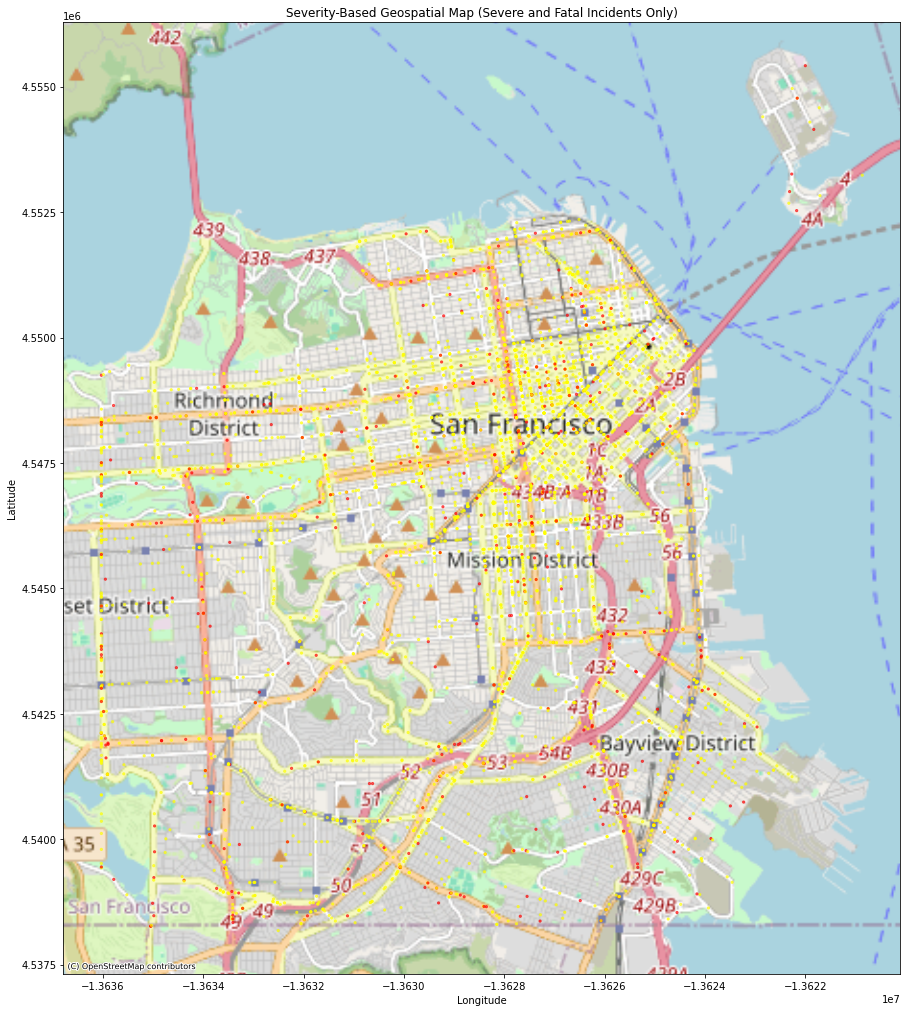

In [ ]:
filtered_data = data[data['collision_severity'].isin(["Injury (Severe)", "Fatal"])]

# Retain only necessary columns
filtered_data = filtered_data[['tb_latitude', 'tb_longitude', 'collision_severity']]

# Assign colors based on severity
severity_colors = {
    "Injury (Severe)": 'yellow',
    "Fatal": 'red'
}
filtered_data['color'] = filtered_data['collision_severity'].map(severity_colors)

#  Create geometry column
geometry = [Point(xy) for xy in zip(filtered_data['tb_longitude'], filtered_data['tb_latitude'])]
gdf = gpd.GeoDataFrame(filtered_data, geometry=geometry, crs="EPSG:4326")

#  Plot the filtered incidents
if gdf.empty:
    print("No valid data to plot. Please check your dataset.")
else:
    # Transform CRS for basemap compatibility
    gdf = gdf.to_crs(epsg=3857)

    # Plot the incidents on a basemap
    fig, ax = plt.subplots(figsize=(15, 20))
    gdf.plot(ax=ax, color=gdf['color'], alpha=0.6, markersize=5)

    # Add basemap
    ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, zoom=12)

    # Customize the plot
    plt.title("Severity-Based Geospatial Map (Severe and Fatal Incidents Only)")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()

- The map displays the geographical distribution of traffic incidents in San Francisco with the red points highlighting where fatal incidents occur.The red points are clustered in mostly intersections indcating these as black spots.


## Further cleaning

In [87]:
#Drop rows where 'collision_severity' is 'Medical'
data = data[data['collision_severity'] != 'Medical']

In [88]:
# converting the entries in the collision_severity column into simplified labels like Pain and Severe
severity_mapping = {
    'Injury (Complaint of Pain)': 'Mild',
    'Injury (Other Visible)': 'Severe',
    'Injury (Severe)': 'Severe',
    'Fatal': 'Severe',
}

# Apply the mapping to the 'collision_severity' column
data['collision_severity'] = data['collision_severity'].replace(severity_mapping)

print(data['collision_severity'].value_counts())

Mild      38781
Severe    22166
Name: collision_severity, dtype: int64


In [89]:
data['weather_1'].value_counts()

Clear                       50215
Cloudy                       5927
Raining                      3603
Not Stated                    655
Fog                           258
Other                         231
Wind                           49
Snowing                         2
Other: Unknown                  1
Other: NOT ON SCENE             1
Other: NOT AT SCENE             1
Other: MISTING                  1
Fog / Visibility: 800 ft        1
Fog / Visibility: 10 ft         1
Fog / Visibility                1
Name: weather_1, dtype: int64

In [90]:
# Replace less informative or rare values with a more general category
data['weather_1'] = data['weather_1'].replace({
    'Other: Unknown': 'Other',
    'Other: NOT ON SCENE': 'Other',
    'Other: NOT AT SCENE': 'Other',
    'Other: MISTING': 'Other',
    'Fog / Visibility: 800 ft': 'Fog',
    'Fog / Visibility: 10 ft': 'Fog',
    'Fog / Visibility': 'Fog',
    'Snowing': 'Snow',  # Grouping different snow-related entries
    'Wind': 'Windy',  # Grouping wind-related values
})

# o drop values with very low frequency (e.g., 1 or 2 occurrences)
# Count the frequency of each value in the column
value_counts = data['weather_1'].value_counts()

# Filter out values that appear only once or twice and replace them with 'Other'
data['weather_1'] = data['weather_1'].apply(lambda x: x if value_counts[x] > 2 else 'Other')

# Check the cleaned column
print(data['weather_1'].value_counts())

Clear         50215
Cloudy         5927
Raining        3603
Not Stated      655
Fog             261
Other           237
Windy            49
Name: weather_1, dtype: int64


In [91]:
data['direction'].value_counts()

Not Stated    33693
South          7380
West           6766
East           6696
North          6411
North Nor         1
Name: direction, dtype: int64

In [92]:
data['direction'] = data['direction'].replace({
    'North Nor': 'North',
})

# Group 'Not Stated' into a more general 'Unknown' category
data['direction'] = data['direction'].replace({
    'Not Stated': 'Unknown',
})


# Check the cleaned column
print(data['direction'].value_counts())

Unknown    33693
South       7380
West        6766
East        6696
North       6412
Name: direction, dtype: int64


In [93]:
data['lighting'].value_counts()

Daylight                                39316
Dark - Street Lights                    18364
Dusk - Dawn                              2134
Not Stated                                592
Dark - No Street Lights                   433
Dark - Street Lights Not Functioning      108
Name: lighting, dtype: int64

In [94]:
data['lighting'] = data['lighting'].replace({
    'Dark - Street Lights Not Functioning': 'Dark',  
    'Dark - No Street Lights': 'Dark',  
    'Not Stated': 'Unknown',  
})

#merge 'Dusk - Dawn' with 'Daylight' 
data['lighting'] = data['lighting'].replace({
    'Dusk - Dawn': 'Daylight',  
})

# Check the cleaned column
print(data['lighting'].value_counts())

Daylight                41450
Dark - Street Lights    18364
Unknown                   592
Dark                      541
Name: lighting, dtype: int64


## 3.0 **Exploratory Data Analysis**

#### 3.1 Univariate Analysis

In [95]:
day_severity_count=data.groupby(['day_of_week','collision_severity']).size().reset_index(name='count')
pvt_table=pd.pivot_table(day_severity_count,values='count',index=['day_of_week'],columns=['collision_severity'],aggfunc='sum')
pvt_table

collision_severity,Mild,Severe
day_of_week,,
Friday,6074,3466
Monday,5310,2948
Saturday,5165,3206
Sunday,4700,2789
Thursday,5842,3217
Tuesday,5815,3243
Wednesday,5875,3297


- The higher numbers of accidents on Friday and Saturday, might be related to increased social activity, weekend travel, or other factors associated with the end of the work week and the weekend.

- The higher number of severe collisions on these days is also worth noting and investigating.

- The lower numbers on Sunday could be attributed to reduced traffic volume, different driving patterns, or other factors.


In [96]:
month_severity_count=data.groupby(['month','collision_severity']).size().reset_index(name='count')
pvt_table_m=pd.pivot_table(month_severity_count,values='count',index=['month'],columns=['collision_severity'],aggfunc='sum')
pvt_table_m

collision_severity,Mild,Severe
month,,
April,3088,1819
August,3286,1889
December,3402,1617
February,3114,1668
January,3189,1654
July,2949,1904
June,3019,1895
March,3286,1869
May,3134,1826


- The high number of accidents in October could be due to various factors, such as:
Changes in weather conditions (e.g., increased rainfall, fog in some regions)
Increased traffic volume due to specific events or activities
Reduced daylight hours in some areas

- June and July's Lower Accident Rate: The lower numbers in June and July might be attributed to factors such as:
  - School holidays, which could lead to changes in commuting patterns
  - More daylight hours
  - Potentially drier weather conditions in some areas



In [97]:
weather_severity_count=data.groupby(['weather_1','collision_severity']).size().reset_index(name='count')
pvt_table_w=pd.pivot_table(weather_severity_count,values='count',index=['weather_1'],columns=['collision_severity'],aggfunc='sum')
pvt_table_w


collision_severity,Mild,Severe
weather_1,,
Clear,31805,18410
Cloudy,3721,2206
Fog,143,118
Not Stated,428,227
Other,148,89
Raining,2504,1099
Windy,32,17


- The high number of accidents in clear weather emphasizes that weather is not the only, or even primary, cause of many accidents. Driver behavior, traffic density, and other factors are crucial.

- The "Not Stated" category highlights the need for better data collection practices to ensure accurate and complete information.

- While clear weather dominates, the data shows that adverse weather conditions like "Cloudy," "Raining," and "Fog" do correlate with accidents, as expected.

- The low number of accidents in windy conditions might suggest that extreme wind is less frequently a direct cause of accidents.

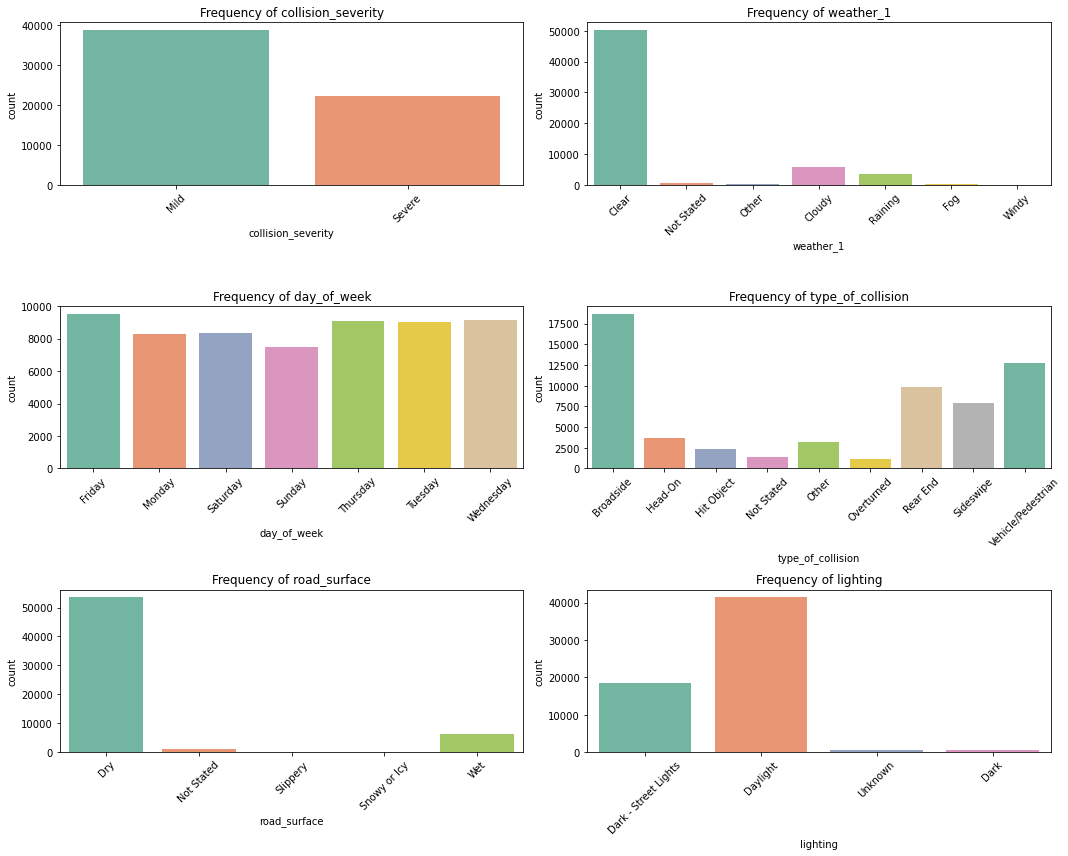

In [98]:
# Bar plot for categorical columns

categorical_columns = ['collision_severity', 'weather_1', 'day_of_week', 'type_of_collision', 'road_surface', 'lighting']

plt.figure(figsize=(15, 12))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=data[col], palette='Set2')
    plt.title(f'Frequency of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


`Key Takeaways:`

- Clear Weather and Dry Roads: Collisions most often occur in clear weather and on dry roads, suggesting that weather and road conditions are not the only factors contributing to accidents.

- Daylight Hours: Collisions are more frequent during daylight hours, which likely correlates with higher traffic volume.

- Data Completeness: The "Not Stated" categories in some charts highlight potential data gaps and the need for more complete information in future studies.

- Collision Types: Broadside and rear-end collisions are common types of accidents.

### 3.2 Bivariate Analysis

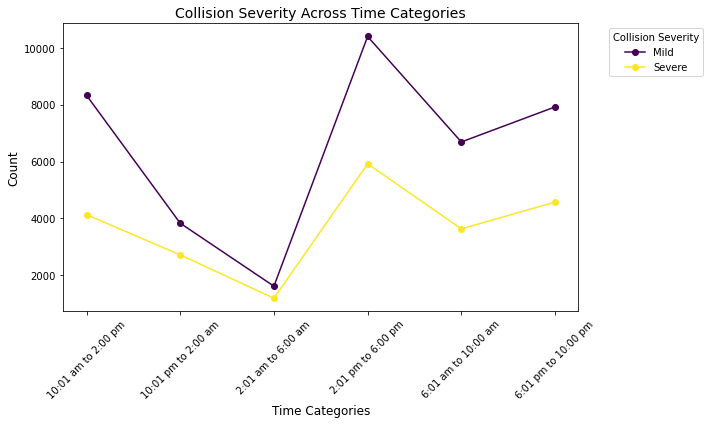

In [99]:
#Time of day versus severity
time_severity = data.groupby(['time_cat', 'collision_severity']).size().unstack(fill_value=0)
time_severity.plot(kind='line', figsize=(10, 6), marker='o', colormap='viridis')
plt.title('Collision Severity Across Time Categories', fontsize=14)
plt.xlabel('Time Categories', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Collision Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Time category "2:01 pm to 6:00 pm" is the most critical period:**

 It shows the highest collision counts for multiple severities. Specifically, injuries categorized as " Mild " peak with over 10,000 collisions, and "severe" injuries also see significant numbers near 4,000. This indicates a high concentration of traffic activity or risk factors during this period, possibly due to peak hours or increased road usage.

**"6:01 am to 10:00 am" also shows elevated activity:**

Likely corresponding to morning commute hours, this interval ranks second in terms of injury counts, making it another key focus for safety measures.

**Low collision counts during late night and early morning hours:**

Time intervals like "10:01 pm to 2:00 am" and "2:01 am to 6:00 am" show comparatively fewer collisions across all severities. This might reflect decreased traffic volume during these hours.

**Take out:**

Overall, the plot suggests traffic safety interventions might be most effective if targeted at the afternoon to early evening and morning commute periods. 

In [100]:
data.columns

Index(['collision_date', 'collision_time', 'accident_year', 'month',
       'day_of_week', 'primary_rd', 'secondary_rd', 'distance', 'direction',
       'weather_1', 'collision_severity', 'type_of_collision', 'mviw',
       'ped_action', 'road_surface', 'road_cond_1', 'lighting',
       'dph_col_grp_description', 'control_device', 'number_killed',
       'number_injured', 'party1_type', 'party1_dir_of_travel',
       'party1_move_pre_acc', 'party2_type', 'party2_dir_of_travel',
       'party2_move_pre_acc', 'time_cat', 'tb_latitude', 'tb_longitude'],
      dtype='object')

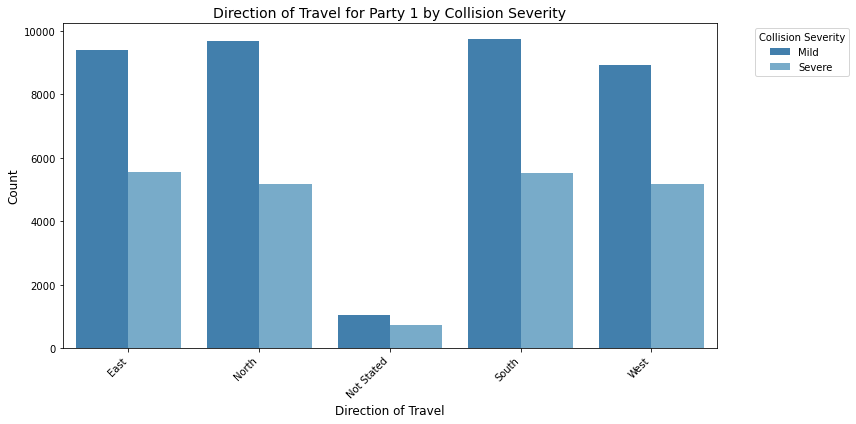

In [101]:
#Direction of parties involved in accidents
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='party1_dir_of_travel', hue='collision_severity', palette='tab20c')
plt.title('Direction of Travel for Party 1 by Collision Severity', fontsize=14)
plt.xlabel('Direction of Travel', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Collision Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



- Across all directions of travel (West, East, North, South), "Mild" is the most common collision severity. This could indicate that minor injuries are far more frequent than severe outcomes for all directions.


- Severe show much lower counts in all directions. This could be indicative of either improved road safety measures or the rarity of severe accidents.


- Certain directions (e.g., West or East) may show relatively higher counts of collisions. This could warrant further exploration—do these directions correspond to busier roads or specific times of day?


- The "Not Stated" category has significantly lower counts across all severities. This could be due to incomplete reporting or cases where direction wasn't a contributing factor.

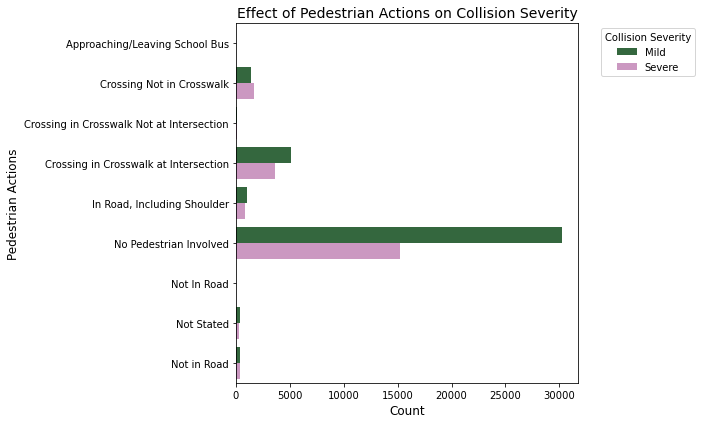

In [102]:
#Effect of pedestrian action on collision severity
plt.figure(figsize=(10, 6))
sns.countplot(data=data, y='ped_action', hue='collision_severity', palette='cubehelix')
plt.title('Effect of Pedestrian Actions on Collision Severity', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Pedestrian Actions', fontsize=12)
plt.legend(title='Collision Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**No Pedestrian Involved dominates the data:** 
This category shows the highest number of collisions, which likely reflects the majority of incidents where pedestrians are not a factor. It highlights the predominance of vehicle-to-vehicle collisions.

**Crossing in Crosswalk at Intersection is the second-largest contributor:** 
Among pedestrian-specific actions, this category stands out. This may indicate higher pedestrian activity at intersections, which are often busy and complex traffic zones.

**Crossing Not in Crosswalk also shows notable collision counts:** 
This suggests that jaywalking or crossing outside designated zones can increase collision risks, though it remains less frequent than crosswalk-related incidents.

**Rare pedestrian actions like Approaching/Leaving School Bus have minimal data:**
These categories show very few collisions, possibly because they are less common pedestrian behaviors or reflect successful safety measures in these scenarios.

**Severe injuries and fatalities are relatively small across all categories:**
The purple and yellow segments (representing fatal and severe injuries) are minor compared to less severe outcomes like "Pain," suggesting that while severe outcomes exist, they are less frequent.

This analysis highlights the importance of focusing safety interventions on high-risk pedestrian behaviors and locations, such as crosswalks at intersections.

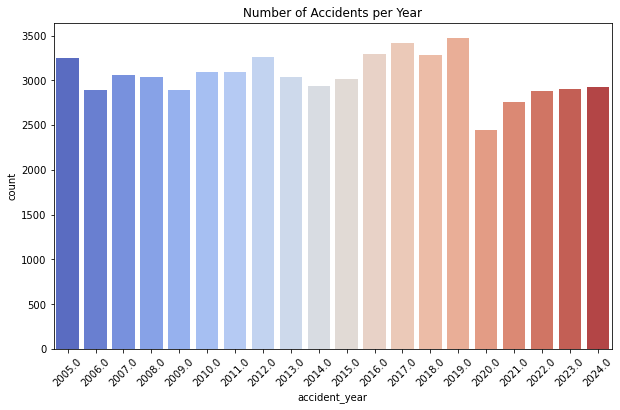

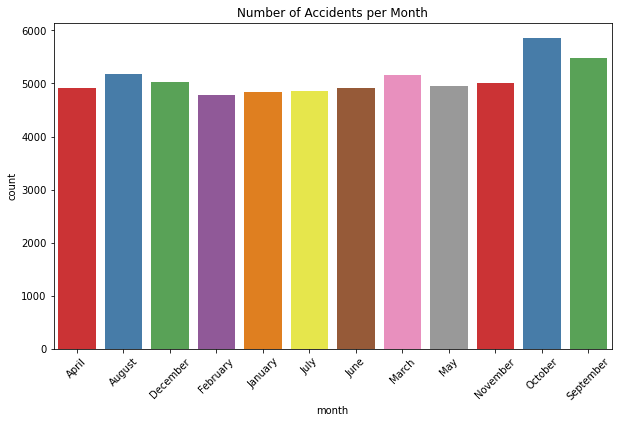

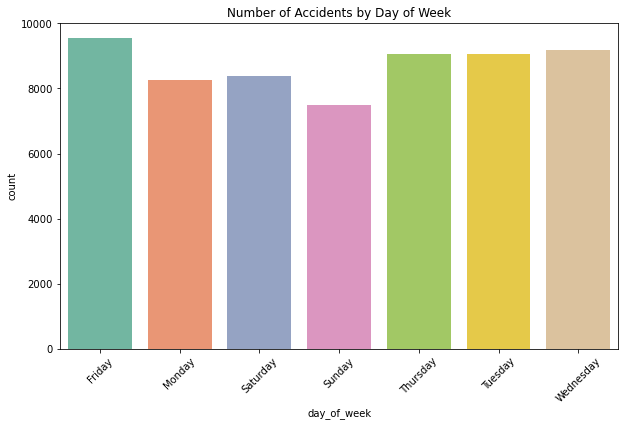

In [103]:
# Distribution of accidents over the year
plt.figure(figsize=(10, 6))
sns.countplot(x=data['accident_year'], palette='coolwarm')
plt.title('Number of Accidents per Year')
plt.xticks(rotation=45)
plt.show()

# Distribution of accidents by month
plt.figure(figsize=(10, 6))
sns.countplot(x=data['month'], palette='Set1')
plt.title('Number of Accidents per Month')
plt.xticks(rotation=45)
plt.show()

# Distribution of accidents by day of week
plt.figure(figsize=(10, 6))
sns.countplot(x=data['day_of_week'], palette='Set2')
plt.title('Number of Accidents by Day of Week')
plt.xticks(rotation=45)
plt.show()


- There appears to be a noticeable increase in accidents in the later years (around 2017-2019).

- There's a visible drop in accidents in the most recent years (2020-2023). This could potentially be related to external factors or changes in data collection.

- Friday shows the highest number of accidents, suggesting it's the most accident-prone day of the week.

- Sunday has the lowest number of accidents, indicating it's the safest day (in terms of accident frequency).

- Thursday, Tuesday, and Wednesday also have relatively high accident counts, comparable to Friday.

- Monday and Saturday fall somewhere in the middle, with a moderate number of accidents.

- October shows the highest number of accidents, indicating it's the most accident-prone month.

- June and July have relatively lower accident counts compared to other months.
Relatively High Counts: August, September, April, and November also show relatively high accident counts.

- The remaining months (December, February, January, March, May) have moderate accident counts.

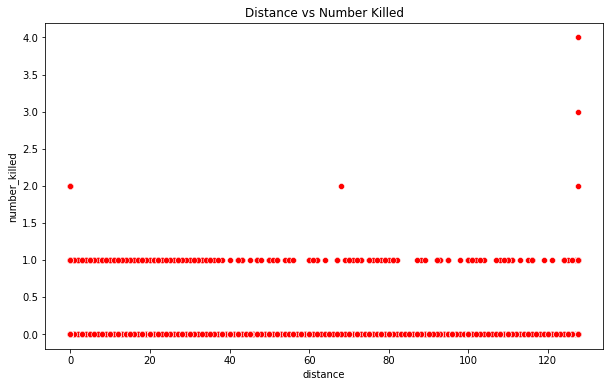

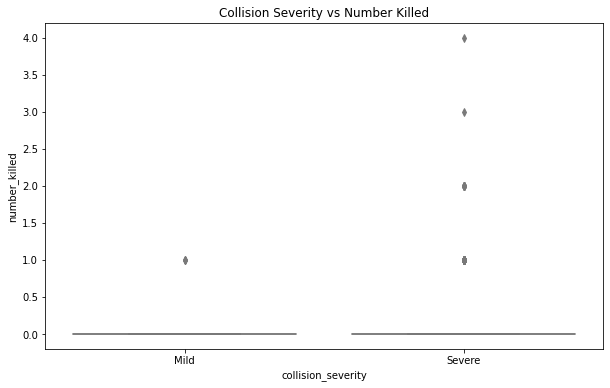

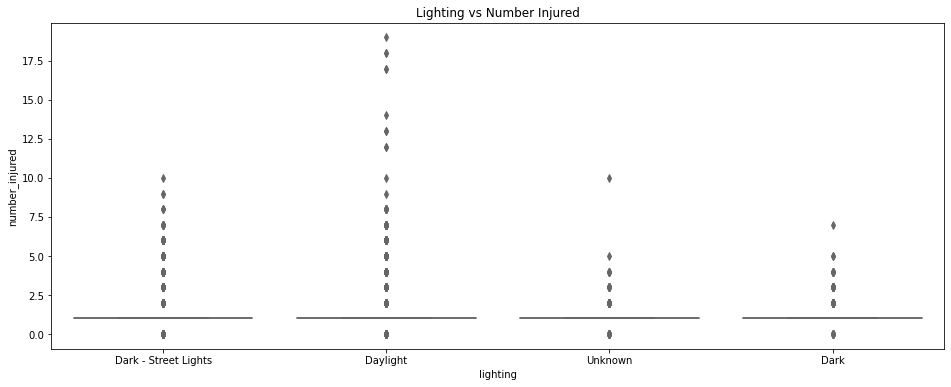

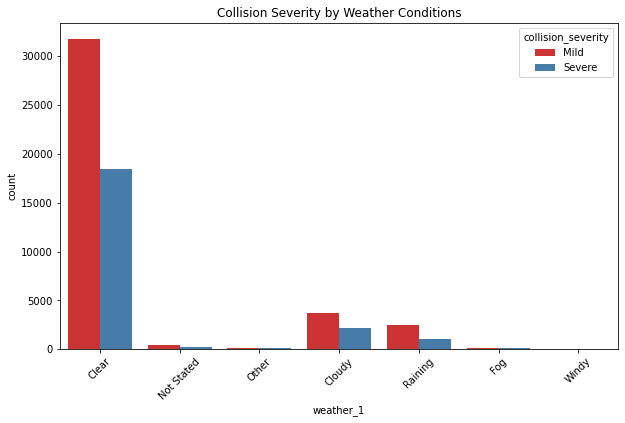

In [104]:
# Distance vs Number Killed
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance', y='number_killed', data=data, color='red')
plt.title('Distance vs Number Killed')
plt.show()

# Collision Severity vs Number Killed
plt.figure(figsize=(10, 6))
sns.boxplot(x='collision_severity', y='number_killed', data=data, palette='coolwarm')
plt.title('Collision Severity vs Number Killed')
plt.show()

# Lighting vs Number Injured
plt.figure(figsize=(16, 6))
sns.boxplot(x='lighting', y='number_injured', data=data, palette='coolwarm')
plt.title('Lighting vs Number Injured')
plt.show()

# weather and collision severity
plt.figure(figsize=(10, 6))
sns.countplot(x='weather_1', hue='collision_severity', data=data, palette='Set1')
plt.title('Collision Severity by Weather Conditions')
plt.xticks(rotation=45)
plt.show()

- Clear Weather Risk: While seemingly safe, clear weather can still lead to a high number of collisions, likely due to factors like increased traffic volume or driver complacency.

- Adverse Weather Impact: While less frequent, adverse weather conditions like rain can still contribute to collisions, particularly those with less severe injuries.

- Data Quality: The "Not Stated" category highlights the importance of accurate data collection for meaningful analysis.

- Rare Fatalities: The data shows that traffic fatalities in San Francisco are relatively infrequent, with most incidents resulting in either zero or one death.

- Severe Outliers: However, there are instances of severe traffic accidents with multiple fatalities (up to 4 in this data), indicating the presence of high-risk scenarios.

- No Distance Correlation: The distance of a traffic incident from a reference point does not appear to have a strong correlation with the number of fatalities. Other factors likely play a more significant role.

- the box plot reveals that while most traffic incidents, regardless of lighting, result in a low number of injuries, the "Daylight" category exhibits the highest variability and the potential for significantly higher injury counts. 

- The "Dark - Street Lights", "Dark", and "Unknown" categories show similar distributions, with the majority of incidents resulting in few injuries.  However, all categories have the potential for outliers, indicating that severe incidents can occur under any lighting condition.

### 3.3 Multivariate analysis

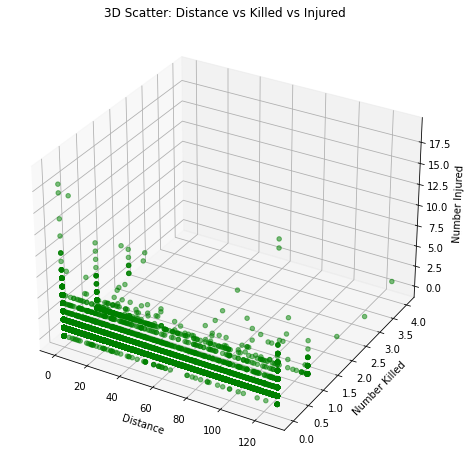

In [105]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['distance'], data['number_killed'],data['number_injured'], alpha=0.5, color='green')
ax.set_xlabel('Distance')
ax.set_ylabel('Number Killed')
ax.set_zlabel('Number Injured')
plt.title('3D Scatter: Distance vs Killed vs Injured')
plt.show()

- Severity Clustering: The clustering of data points at low values suggests that incidents with low numbers of fatalities and injuries are more common.

- Potential for High-Severity Outliers: The presence of outliers indicates the possibility of events with unusually high numbers of casualties, which might warrant further investigation.

- Limited Distance Correlation: The lack of a clear pattern with distance suggests that distance alone may not be a strong predictor of the severity of an incident (number of killed or injured).

**droping more columns**

In [106]:
data = data.drop(columns = ['collision_date', 'collision_time','accident_year','primary_rd', 'secondary_rd','direction', 'mviw','road_cond_1','dph_col_grp_description','party1_type','party2_type','time_cat','tb_longitude','tb_latitude'], axis = 1)

In [107]:
data.columns

Index(['month', 'day_of_week', 'distance', 'weather_1', 'collision_severity',
       'type_of_collision', 'ped_action', 'road_surface', 'lighting',
       'control_device', 'number_killed', 'number_injured',
       'party1_dir_of_travel', 'party1_move_pre_acc', 'party2_dir_of_travel',
       'party2_move_pre_acc'],
      dtype='object')

# **4.0 Hypothesis testing**

#### 4.1 Chi-Square Test for Weather and Collision Severity

In [108]:

import scipy.stats as stats


contingency_table = pd.crosstab(data['weather_1'], data['collision_severity'])

chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi2 Stat: {chi2_stat}")
print(f"P-Value: {p_value}")


alpha = 0.05
if p_value <= alpha:
    print("Reject the null hypothesis: Weather significantly affects collision severity.")
else:
    print("Fail to reject the null hypothesis: No significant effect of weather on collision severity.")

Chi2 Stat: 67.15450977812125
P-Value: 1.5649396982074342e-12
Reject the null hypothesis: Weather significantly affects collision severity.


#### 4.2 ANOVA for Road Surface and Number of Injuries

In [109]:

road_surface_groups = [data[data['road_surface'] == road_surface]['number_injured'] for road_surface in data['road_surface'].unique()]

# Conducting ANOVA
f_stat, p_value = stats.f_oneway(*road_surface_groups)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

# Interpreting the result
alpha = 0.05
if p_value <= alpha:
    print("Reject the null hypothesis: Road surface conditions affect the number of injuries.")
else:
    print("Fail to reject the null hypothesis: No significant effect of road surface on the number of injuries.")



F-statistic: 5.697111713669578
P-value: 0.0001398127144369789
Reject the null hypothesis: Road surface conditions affect the number of injuries.


In [110]:
# Separating the categorical and numerical columns
categorical_cols = data.drop(columns =['number_killed','number_injured','distance'])
categorical_cols.head()

,month,day_of_week,weather_1,collision_severity,type_of_collision,ped_action,road_surface,lighting,control_device,party1_dir_of_travel,party1_move_pre_acc,party2_dir_of_travel,party2_move_pre_acc
0,January,Wednesday,Clear,Mild,Overturned,No Pedestrian Involved,Dry,Dark - Street Lights,None,West,Proceeding Straight,Unknown,Unknown
1,February,Wednesday,Clear,Mild,Other,No Pedestrian Involved,Dry,Daylight,None,East,Proceeding Straight,Unknown,Unknown
2,November,Sunday,Clear,Severe,Hit Object,No Pedestrian Involved,Dry,Daylight,None,North,Proceeding Straight,Unknown,Unknown
3,July,Friday,Clear,Mild,Broadside,No Pedestrian Involved,Dry,Daylight,Functioning,East,Making Left Turn,East,Making Left Turn
4,May,Thursday,Not Stated,Mild,Not Stated,Not Stated,Not Stated,Unknown,Not Stated,North,Not Stated,West,Not Stated


In [111]:
numeric_cols = data[['number_killed','number_injured','distance']]
numeric_cols.head()

,number_killed,number_injured,distance
0,0.0,1,68.0
1,0.0,1,20.0
2,0.0,2,127.5
3,0.0,1,0.0
4,0.0,1,0.0


<AxesSubplot:>

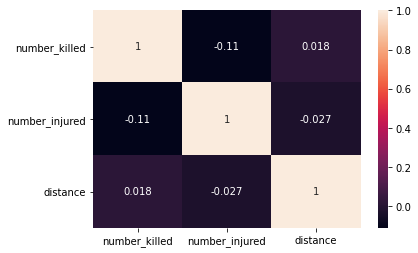

In [112]:
# Using the numerical columns to explore correlations since the correlation is only useful for quantitative variables. 
# Correlation shows they relate to each other.Because regression techniques represent the relationship in which the independent variable affects the dependent variable, 
# the weight for that variable in the regression formula may vary depending on the direction and strength of the correlation.

corr = numeric_cols.corr()
sns.heatmap(corr,annot = True)

The formula used to calculate the correlation above is the pearson correlation coefficient that shows the linear relationship between two variables. 1 means a perfect positive linear correlation, -1 means that there is a perfect negative correlation and 0 meand thet there is no linear correlation. the graph above shows that the variable that shows the strongest linear with number killed is number injured though a negative relationship.

It is recommended that we use the pair plot together with the correlation graph to comprehensively investigate correlation between variables.The pairplot provided by the seaborn library visualizes and shows the correlation of seach variable below:

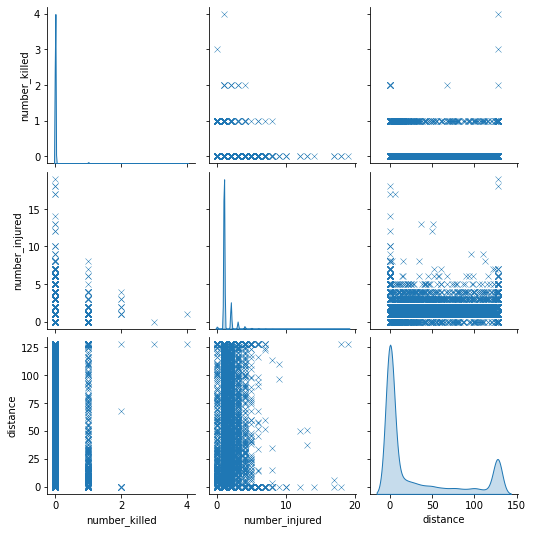

In [113]:
sns.pairplot(numeric_cols,markers = 'x',diag_kind= 'kde')

Looking at the pairplot we can see that most of the data is skewed to the left rater than evenly distributed.

We can therefore visualize the distribution through a histogram.

array([[<AxesSubplot:title={'center':'number_killed'}>,
        <AxesSubplot:title={'center':'number_injured'}>],
       [<AxesSubplot:title={'center':'distance'}>, <AxesSubplot:>]],
      dtype=object)

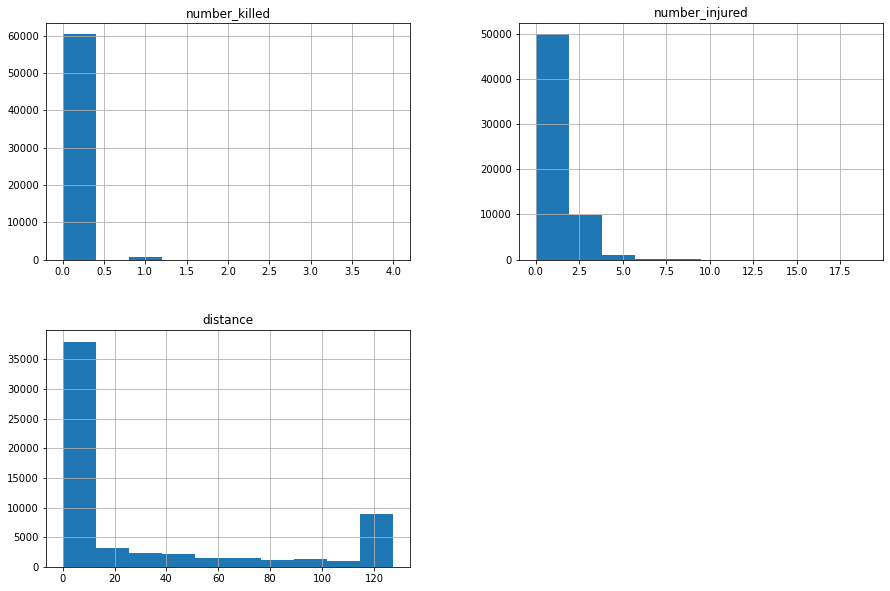

In [114]:
numeric_cols.hist(figsize=(15,10))

Logistic regression is an appropriate regression technique for a data closer to a normal distribution therefore data shown above isn't appropriate for applying it. 

We can apply the Log Transformation to bring such extreme data close to a normal distribution.

array([[<AxesSubplot:title={'center':'number_killed'}>,
        <AxesSubplot:title={'center':'number_injured'}>],
       [<AxesSubplot:title={'center':'distance'}>, <AxesSubplot:>]],
      dtype=object)

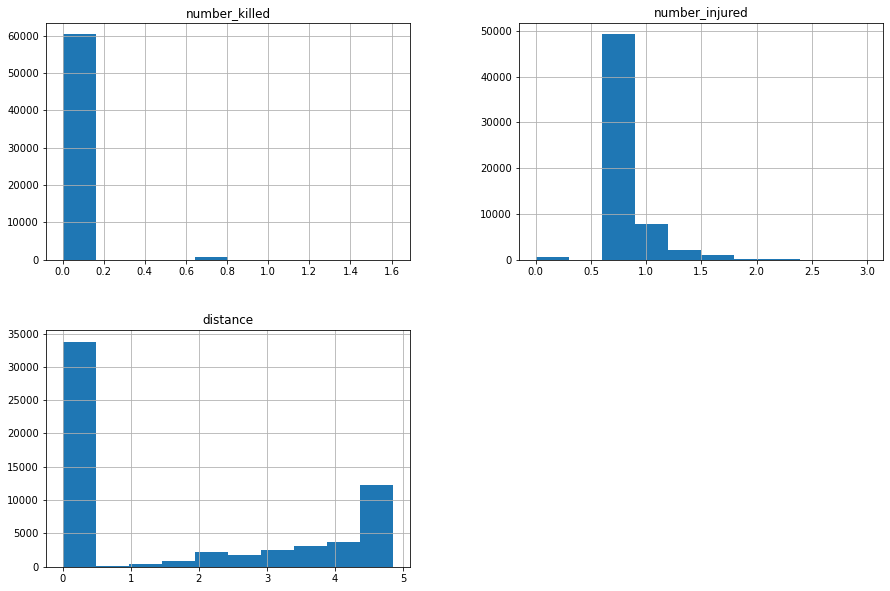

In [115]:
numeric_data_log = np.log(numeric_cols +1) #Since the values of 0 and 1 return negative values we add 1 to the whole data and apply the function
numeric_data_log.hist(figsize=(15,10))

<AxesSubplot:>

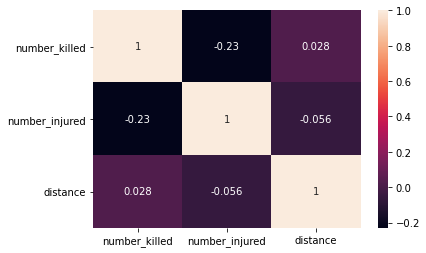

In [116]:
corr = numeric_data_log.corr()
sns.heatmap(corr,annot = True)

There is a notable change in the distribution after applying  log transformation on the numerical columns

In [117]:
# Combine Categorical data and the numeric_data_log in preparation of modelling

data = pd.concat([categorical_cols , numeric_data_log], axis=1) 
data.head()

,month,day_of_week,weather_1,collision_severity,type_of_collision,ped_action,road_surface,lighting,control_device,party1_dir_of_travel,party1_move_pre_acc,party2_dir_of_travel,party2_move_pre_acc,number_killed,number_injured,distance
0,January,Wednesday,Clear,Mild,Overturned,No Pedestrian Involved,Dry,Dark - Street Lights,None,West,Proceeding Straight,Unknown,Unknown,0.0,0.693147,4.234107
1,February,Wednesday,Clear,Mild,Other,No Pedestrian Involved,Dry,Daylight,None,East,Proceeding Straight,Unknown,Unknown,0.0,0.693147,3.044522
2,November,Sunday,Clear,Severe,Hit Object,No Pedestrian Involved,Dry,Daylight,None,North,Proceeding Straight,Unknown,Unknown,0.0,1.098612,4.855929
3,July,Friday,Clear,Mild,Broadside,No Pedestrian Involved,Dry,Daylight,Functioning,East,Making Left Turn,East,Making Left Turn,0.0,0.693147,0.000000
4,May,Thursday,Not Stated,Mild,Not Stated,Not Stated,Not Stated,Unknown,Not Stated,North,Not Stated,West,Not Stated,0.0,0.693147,0.000000


# **5.0 Modelling**

 - **RandomForest Model**
 - **Logistic Regression Model**
 - **SVC model**
 - **KNeighbours Classifier**
 - **XGBoost Model**

In [118]:
# Define the target and features
X = data.drop(columns=['collision_severity'])
y = data['collision_severity']

# Encode target variable using Label Encoding
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # This will encode "Mild", "Severe" into 0, 1, 

# Define categorical and numerical columns
categorical_cols = ['weather_1','type_of_collision','ped_action','road_surface','lighting', 
                   'control_device','party1_dir_of_travel', 
                    'party1_move_pre_acc','party2_dir_of_travel','party2_move_pre_acc', 
                    'month','day_of_week']
numerical_cols = ['distance','number_killed','number_injured']

# Preprocessing for numerical data: Impute missing values and scale the data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

# Preprocessing for categorical data: Impute missing values and one-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Helper function to train and evaluate models
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Create and evaluate the pipeline
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])
    
    # Train the model
    clf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = clf.predict(X_test)
    
    # Decode the predicted labels back to original target labels
    y_pred_decoded = label_encoder.inverse_transform(y_pred)
    y_test_decoded = label_encoder.inverse_transform(y_test)

    # Print evaluation metrics
    print(f"\n{model_name} - Classification Report:")
    print(classification_report(y_test_decoded, y_pred_decoded))
    print(f"{model_name} - Confusion Matrix:")
    print(confusion_matrix(y_test_decoded, y_pred_decoded))
 # 1. Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
train_and_evaluate_model(rf_model, X_train, X_test, y_train, y_test, "Random Forest")

# 2. Logistic Regression (Multinomial)
log_reg_model = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)
train_and_evaluate_model(log_reg_model, X_train, X_test, y_train, y_test, "Logistic Regression")

# 3. Support Vector Classifier (SVC)
svc_model = SVC(kernel='linear', decision_function_shape='ovr', random_state=42)
train_and_evaluate_model(svc_model, X_train, X_test, y_train, y_test, "Support Vector Classifier")

# 4. k-Nearest Neighbors (k-NN)
knn_model = KNeighborsClassifier(n_neighbors=5)
train_and_evaluate_model(knn_model, X_train, X_test, y_train, y_test, "k-Nearest Neighbors")

# 5. XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
train_and_evaluate_model(xgb_model, X_train, X_test, y_train, y_test, "XGBoost")


Random Forest - Classification Report:
              precision    recall  f1-score   support

        Mild       0.68      0.83      0.75      7764
      Severe       0.51      0.30      0.38      4426

    accuracy                           0.64     12190
   macro avg       0.59      0.57      0.56     12190
weighted avg       0.62      0.64      0.61     12190

Random Forest - Confusion Matrix:
[[6472 1292]
 [3079 1347]]

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

        Mild       0.67      0.91      0.77      7764
      Severe       0.59      0.23      0.33      4426

    accuracy                           0.66     12190
   macro avg       0.63      0.57      0.55     12190
weighted avg       0.65      0.66      0.61     12190

Logistic Regression - Confusion Matrix:
[[7063  701]
 [3403 1023]]

Support Vector Classifier - Classification Report:
              precision    recall  f1-score   support

        Mild       0.67  

- For Mild collisions, Support Vector Classifier, Logistic Regression, and XGBoost are the best performing models, with high recall and F1-scores.

- For Severe collisions, all models struggle, with Random Forest performing slightly better due to its higher recall, but still missing many Severe collisions.

- In general, the models seem to perform better in predicting Mild collisions, while Severe collisions are more challenging,  due to a class imbalance.

- After evaluating the performance of the models (Random Forest and XGBoost) on the dataset, we want to explore the underlying importance of the features used in these models.

- Feature importance helps to identify which features have the most influence on the model's predictions. This can guide us in feature selection, potentially improving model performance, interpretability, and reducing overfitting.

- Since both Random Forest and XGBoost are tree-based models, they inherently provide a measure of feature importance based on how much each feature contributes to reducing uncertainty .

 **5.1 Checking for Feature Importance**

In [119]:
# 1. Extract feature importance for Random Forest and XGBoost
rf_importance = rf_model.feature_importances_
xgb_importance = xgb_model.feature_importances_

# 2. Get the feature names after preprocessing (after one-hot encoding)
categorical_columns = categorical_cols  # List of categorical columns
num_columns = numerical_cols  # List of numerical columns

# Fit the preprocessor to the full dataset (or just the training data)
preprocessor.fit(X, y_encoded)

# Get feature names after one-hot encoding
num_features = num_columns  # Numerical features stay the same
cat_features = preprocessor.transformers_[1][1].named_steps['onehot'].get_feature_names(categorical_columns)

# Combine numerical and categorical feature names
all_feature_names = np.concatenate([num_features, cat_features])

# Ensure feature importance arrays match the number of features
assert len(all_feature_names) == len(rf_importance), "Mismatch in feature lengths for Random Forest"
assert len(all_feature_names) == len(xgb_importance), "Mismatch in feature lengths for XGBoost"

# 3. Combine feature importances into a DataFrame
importance_data = {
    'Feature': all_feature_names,
    'Random Forest': rf_importance,
    'XGBoost': xgb_importance
}

importance_df = pd.DataFrame(importance_data)

# 4. Sort the feature importances by 'Random Forest' (descending order)
rf_sorted = importance_df.sort_values(by='Random Forest', ascending=False)

# 5. Sort the feature importances by 'XGBoost' (descending order)
xgb_sorted = importance_df.sort_values(by='XGBoost', ascending=False)

# Display the sorted DataFrames
print("\nSorted Feature Importances for Random Forest:")
print(rf_sorted[['Feature', 'Random Forest']])

print("\nSorted Feature Importances for XGBoost:")
print(xgb_sorted[['Feature', 'XGBoost']])


Sorted Feature Importances for Random Forest:
                                               Feature  Random Forest
0                                             distance       0.077324
2                                       number_injured       0.044091
115                              day_of_week_Wednesday       0.022011
109                                 day_of_week_Friday       0.021974
114                                day_of_week_Tuesday       0.021490
..                                                 ...            ...
86            party2_move_pre_acc_Other Unsafe Turning       0.000074
78   party2_move_pre_acc_Crossed Into Opposing Lane...       0.000056
19           ped_action_Approaching/Leaving School Bus       0.000050
25                              ped_action_Not In Road       0.000047
68         party1_move_pre_acc_Xing into Opposing Lane       0.000006

[116 rows x 2 columns]

Sorted Feature Importances for XGBoost:
                                              Fe

### Obtaining the top 10 most important features


In [120]:
# Get the top 10 features for Random Forest
top_rf_features = rf_sorted.head(10)

# Get the top 10 features for XGBoost
top_xgb_features = xgb_sorted.head(10)

# Display the results
print("Top 10 Features for Random Forest:")
print(top_rf_features[['Feature', 'Random Forest']])

print("\nTop 10 Features for XGBoost:")
print(top_xgb_features[['Feature', 'XGBoost']])

Top 10 Features for Random Forest:
                        Feature  Random Forest
0                      distance       0.077324
2                number_injured       0.044091
115       day_of_week_Wednesday       0.022011
109          day_of_week_Friday       0.021974
114         day_of_week_Tuesday       0.021490
113        day_of_week_Thursday       0.021280
111        day_of_week_Saturday       0.020758
110          day_of_week_Monday       0.020574
42    party1_dir_of_travel_East       0.020385
45   party1_dir_of_travel_South       0.020349

Top 10 Features for XGBoost:
                                 Feature   XGBoost
16            type_of_collision_Rear End  0.115410
1                          number_killed  0.105419
73          party2_dir_of_travel_Unknown  0.048582
20  ped_action_Crossing Not in Crosswalk  0.036917
94   party2_move_pre_acc_Stopped In Road  0.027012
93           party2_move_pre_acc_Stopped  0.018915
24     ped_action_No Pedestrian Involved  0.018375
87        

- After reviewing the top features from both models, we selected the following features for further modeling: 'distance', 'number_injured', 'day_of_week', 'party1_dir_of_travel', 'number_killed', 'type_of_collision', and 'party2_dir_of_travel'. 

- These features were chosen because they appeared to have high importance scores in both Random Forest and XGBoost models. Additionally, these features are relevant to the domain , and it is likely that they carry significant predictive power for the target variable, which could be related to accident severity or other traffic-related outcomes.

- we chose to keep features that were consistently ranked highly by both models, ensuring that the selected features were important across different model types. By using this selection, we aim to improve model performance while also simplifying the feature set, making it easier to interpret and reducing potential noise from irrelevant features.

**5.2 Retraining Logistic regression and XGBoost with the selected features**

In [121]:
# List of selected features based on importance 
selected_features = ['distance', 'number_injured', 'day_of_week', 
                     'party1_dir_of_travel', 'number_killed', 
                     'type_of_collision', 'party2_dir_of_travel']

# Update the X dataframe to include only the selected features
X_selected = data[selected_features]

# Update the categorical and numerical columns based on selected features
# 'party1_dir_of_travel' and 'party2_dir_of_travel' are categorical, and 'day_of_week' is also categorical
categorical_cols_selected = ['party1_dir_of_travel', 'party2_dir_of_travel', 'day_of_week']
numerical_cols_selected = ['distance', 'number_injured', 'number_killed']

# Preprocessing for numerical data: Impute missing values and scale the data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

# Preprocessing for categorical data: Impute missing values and one-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols_selected),
        ('cat', categorical_transformer, categorical_cols_selected)
    ])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_encoded, test_size=0.2, random_state=42)

# Helper function to train and evaluate models
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Create and evaluate the pipeline
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])
    
    # Train the model
    clf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = clf.predict(X_test)
    
    # Decode the predicted labels back to original target labels
    y_pred_decoded = label_encoder.inverse_transform(y_pred)
    y_test_decoded = label_encoder.inverse_transform(y_test)

    # Print evaluation metrics
    print(f"\n{model_name} - Classification Report:")
    print(classification_report(y_test_decoded, y_pred_decoded))
    print(f"{model_name} - Confusion Matrix:")
    print(confusion_matrix(y_test_decoded, y_pred_decoded))

# 1. Logistic Regression Classifier
log_reg_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
train_and_evaluate_model(log_reg_model, X_train, X_test, y_train, y_test, "Logistic Regression")


# 2. XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
train_and_evaluate_model(xgb_model, X_train, X_test, y_train, y_test, "XGBoost")




Logistic Regression - Classification Report:
              precision    recall  f1-score   support

        Mild       0.66      0.95      0.78      7764
      Severe       0.64      0.14      0.23      4426

    accuracy                           0.66     12190
   macro avg       0.65      0.55      0.51     12190
weighted avg       0.65      0.66      0.58     12190

Logistic Regression - Confusion Matrix:
[[7410  354]
 [3803  623]]
[11:03:30] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.



XGBoost - Classification Report:
              precision    recall  f1-score   support

        Mild       0.66      0.92      0.77      7764
      Severe       0.5

Key Observations and Insights:

- ``Improvement in 'Mild' Classification:`` Both models (Logistic Regression and XGBoost) seem to perform better at identifying 'Mild' cases after feature selection, with increased recall. This is likely due to the removal of noise from less important features.

- ``Decline in 'Severe' Classification:`` There is a significant decrease in recall for the 'Severe' class in both models. Feature selection appears to have removed important variables that helped in predicting severe accidents, thus reducing the model’s ability to correctly identify these cases.

- ``Overall Accuracy:`` The accuracy of both models remained relatively stable, but the underlying class imbalance might still be affecting the evaluation. Accuracy can be misleading, especially when recall for 'Severe' is low, as it's not an effective indicator of model performance across all classes in an imbalanced dataset.

- ``Precision vs. Recall Tradeoff:`` There is a tradeoff between precision and recall, especially for the 'Severe' class. The models are more focused on 'Mild' predictions.

**5.3 Hyperparameter tuning**

 hyperparameter tuning is performed using GridSearchCV to optimize the performance of two machine learning models: Logistic Regression and XGBoost.

In [122]:
# List of selected features based on importance (including 'day_of_week')
selected_features = ['distance', 'number_injured', 'day_of_week', 
                     'party1_dir_of_travel', 'number_killed', 
                     'type_of_collision', 'party2_dir_of_travel']
# Update the X dataframe to include only the selected features
X_selected = data[selected_features]

# Update the categorical and numerical columns based on selected features
categorical_cols_selected = ['party1_dir_of_travel', 'party2_dir_of_travel', 'day_of_week']
numerical_cols_selected = ['distance', 'number_injured', 'number_killed']

# Preprocessing for numerical data: Impute missing values and scale the data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

# Preprocessing for categorical data: Impute missing values and one-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols_selected),
        ('cat', categorical_transformer, categorical_cols_selected)
    ])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_encoded, test_size=0.2, random_state=42)

# Helper function to train and evaluate models
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test, model_name, param_grid):
    

    # Create and evaluate the pipeline with SMOTE and GridSearchCV
    clf = imbaPipeline(steps=[('preprocessor', preprocessor),
                             ('model', model)])

    # Perform GridSearchCV with limited parameters to avoid memory overload
    grid_search = GridSearchCV(clf, param_grid, cv=2, n_jobs=-1, verbose=1, scoring='accuracy')

    # Train the model with GridSearchCV
    grid_search.fit(X_train, y_train)
    
    # Get the best model from grid search
    best_model = grid_search.best_estimator_

    # Make predictions
    y_pred = best_model.predict(X_test)
    
    # Decode the predicted labels back to original target labels
    y_pred_decoded = label_encoder.inverse_transform(y_pred)
    y_test_decoded = label_encoder.inverse_transform(y_test)

    # Print evaluation metrics
    print(f"\n{model_name} - Best Parameters from GridSearchCV: {grid_search.best_params_}")
    print(f"\n{model_name} - Classification Report:")
    print(classification_report(y_test_decoded, y_pred_decoded))
    print(f"{model_name} - Confusion Matrix:")
    print(confusion_matrix(y_test_decoded, y_pred_decoded))

# 1. Logistic Regression Model
log_reg_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)

# GridSearchCV parameter grid for Logistic Regression (keeping it simple)
log_reg_param_grid = {
    'model__C': [0.01, 0.1, 1],  # Regularization strength
    'model__max_iter': [500, 1000],  # Iterations limit
    'model__solver': ['lbfgs', 'liblinear']  # Solvers to try
}

train_and_evaluate_model(log_reg_model, X_train, X_test, y_train, y_test, "Logistic Regression", log_reg_param_grid)

# 2. XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# GridSearchCV parameter grid for XGBoost (keeping it simple)
xgb_param_grid = {
    'model__max_depth': [3, 6],         # max depth
    'model__learning_rate': [0.01, 0.1], # Learning rates
    'model__n_estimators': [50, 100],  # estimators for efficiency
    'model__subsample': [0.8, 1.0]     # Lsubsample to avoid overfitting
}


train_and_evaluate_model(xgb_model, X_train, X_test, y_train, y_test, "XGBoost", xgb_param_grid)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   21.4s finished



Logistic Regression - Best Parameters from GridSearchCV: {'model__C': 0.1, 'model__max_iter': 500, 'model__solver': 'lbfgs'}

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

        Mild       0.66      0.95      0.78      7764
      Severe       0.64      0.14      0.23      4426

    accuracy                           0.66     12190
   macro avg       0.65      0.55      0.51     12190
weighted avg       0.65      0.66      0.58     12190

Logistic Regression - Confusion Matrix:
[[7410  354]
 [3803  623]]
Fitting 2 folds for each of 16 candidates, totalling 32 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:  1.2min finished


[11:05:21] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.



XGBoost - Best Parameters from GridSearchCV: {'model__learning_rate': 0.01, 'model__max_depth': 3, 'model__n_estimators': 50, 'model__subsample': 0.8}

XGBoost - Classification Report:
              precision    recall  f1-score   support

        Mild       0.66      0.95      0.78      7764
      Severe       0.64      0.14      0.23      4426

    accuracy                           0.66     12190
   macro avg       0.65      0.55      0.51     12190
weighted avg       0.65      0.66      0.58     12190

XGBoost - Confusion Matrix:
[[7408  356]
 [3800  626]]


**5.6 Comparison and Conclusion:**

``Effect on Precision and Recall:``

Both models show an increase in Mild recall after hyperparameter tuning, suggesting they are now better at detecting the Mild cases. However, this comes at the cost of Severe recall, which decreased in both models.

``Accuracy:``

Despite the changes in precision and recall, the overall accuracy for both models remained unchanged at 0.66. This is due to the class imbalance, where the model may correctly predict the majority class (Mild) but fail to predict the minority class (Severe) effectively.

``Severe Class Recall:``

Both models now perform worse on the Severe class after tuning, with recall dropping from around 0.24 (Logistic Regression) and 0.20 (XGBoost) to 0.13 for both after hyperparameter tuning. 

``Confusion Matrix:``

Both models show an increase in Mild true positives after hyperparameter tuning (as seen in the increased values in the first row of the confusion matrix). However, they also show an increase in Severe false negatives (as seen in the second row), indicating a deterioration in performance for the Severe class.



**5.7 Best Model**

Even though both models perform similarly, XGBoost is often a safer choice due to its robustness in handling complex and non-linear relationships, as well as its ability to handle imbalanced datasets more effectively.

That said, further fine-tuning, especially in terms of balancing Severe class detection (e.g., through class weights, resampling techniques, or different evaluation metrics), could improve both models’ performance.

**6.0 Recommendations and Next steps**

- Advanced Feature Engineering: Investigate potential feature transformations, interaction terms, and non-linear features that might better represent the underlying patterns in the data. Creating new features or aggregating features could improve model performance.

- try more sophisticated, non-linear methods like tree-based models or ensembles.

- Tuning Regularization: For some models (like neural networks or linear models), experiment with L1/L2 regularization to control overfitting.

- Feature Transformation: Experiment with non-linear transformations of your features (e.g., log transformations, polynomial features, or PCA for dimensionality reduction) to improve how the model learns from the data.

- onclusion Based on EDA.

We have noted that environmental factors have a limited contribution to occurrence of accidents and to the severity. Human behaviour or features influenced by or correlated with human behaviour. e.g. month (seasonality influence on human behaviour), type of collision, pedestrian action and intersection are a major determinant of accident occurrence and accident severity.

- Recommendations based on EDA.

Jurisdictions should therefore invest more in human behaviour change strategies in order to reduce occurrence of accidents and their severity. The may include pedestrian and driver sensitization on road use, fines and penalties on risky behaviours and structuring driver courses and /or refresher courses to emphasise on safe road use.
